In [0]:
# List the files inside the dataset_Lenskart directory
display(dbutils.fs.ls('dbfs:/mnt/blobstorage/dataset_Lenskart/'))

In [0]:
df_product= spark.read.csv('/mnt/blobstorage/dataset_Lenskart/products_tf.csv',inferSchema=True, header=True)
df_transaction= spark.read.csv('/mnt/blobstorage/dataset_Lenskart/transaction.csv',inferSchema=True, header=True)

In [0]:
from pyspark.sql.functions import sum, col

# Calculate total sales

df_combined = df_transaction.join(df_product, 'product_id', 'inner')
df_sales = df_transaction.join(df_product, 'product_id', 'inner') \
    .select('product_id', (col('quantity') * col(' price')).alias('sales'))

total_sales = df_sales.groupBy().agg(sum('sales')).collect()[0][0]

# Calculate total cost
df_cost = df_transaction.join(df_product, 'product_id', 'inner') \
    .select('product_id', (col('quantity') * col('cost_of_product')).alias('cost'))

total_cost = df_cost.groupBy().agg(sum('cost')).collect()[0][0]

# Calculate gross profit
gross_profit = total_sales - total_cost

# Calculate net profit
net_profit = total_sales -(total_cost+ 0.18*total_cost)

print("Total Sales:", total_sales)
print("Total Cost:", total_cost)
print("Gross Profit:", gross_profit)
print("Net Proft:",net_profit)


Total Sales: 275958293
Total Cost: 179927620
Gross Profit: 96030673
Net Proft: 63643701.400000006


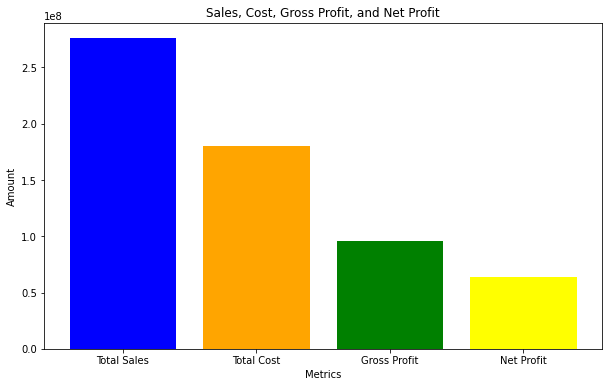

In [0]:
import matplotlib.pyplot as plt

# Define labels and values for the bar chart
labels = ['Total Sales', 'Total Cost', 'Gross Profit','Net Profit']
values = [total_sales, total_cost, gross_profit,net_profit]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'orange', 'green','yellow'])
plt.xlabel('Metrics')
plt.ylabel('Amount')
plt.title('Sales, Cost, Gross Profit, and Net Profit')
plt.show()
